# Linear Models
## Initialising R  
In this lesson we will be exploring the cars database that will be used in your A-level.
We will be using a powerful programming language called *R*.
To run code in *R*:  
1. Click on the box containing code to highlight it in green.
2. Click on the play button above to show the output.

#### **Exercise 1**  
Load the data and settings by running the code below. If you do this successfully you should get a message in the output.

In [1]:
library(tidyverse)
library(readr)

options(repr.plot.width=8,
        repr.plot.height=4,
        warn=-1)

clean_theme <- theme_bw(base_size=12, base_family="sans") + 
  theme(panel.border = element_blank(), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        legend.text = element_text(size = 12),
        legend.title = element_text(size=12),
        axis.line = element_line(size = 0.5, colour = "black"),
        axis.title = element_text(face = "plain"),
        strip.background = element_blank()
  )

clean_theme_hist <- theme_bw(base_size=12, base_family="sans") + 
  theme(panel.border = element_blank(), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        legend.text = element_text(size = 12),
        legend.title = element_text(size=12),
        axis.line = element_line(size = 0.5, colour = "black"),
        axis.title = element_text(face = "plain"),
        strip.background = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
  )

car_df <-
  read_csv("cars_data.csv")

car_data <-
  car_df %>%
  mutate(YearRegistered = as.factor(YearRegistered),
         GovRegion = as.factor(GovRegion),
         PropulsionTypeId = as.factor(ifelse(PropulsionTypeId == 1, "Petrol",
                                   ifelse(PropulsionTypeId == 2, "Diesel",
                                          ifelse(PropulsionTypeId == 3, "Electric",
                                                 ifelse(PropulsionTypeId == 7, "Gas/Petrol",
                                                        ifelse(PropulsionTypeId == 8, "Electric/Petrol", NA)))))),
         BodyTypeId = as.factor(ifelse(BodyTypeId == 1, "2 door saloon",
                             ifelse(BodyTypeId == 2, "4 door saloon",
                                    ifelse(BodyTypeId == 3, "saloon",
                                           ifelse(BodyTypeId == 4, "convertible",
                                                  ifelse(BodyTypeId == 5, "coupe",
                                                         ifelse(BodyTypeId == 6, "estate",
                                                                ifelse(BodyTypeId == 13, "3 door hatchback",
                                                                       ifelse(BodyTypeId == 14, "5 door hatchback",
                                                                              ifelse(BodyTypeId == 96, "Multi Purpose Vehicle", NA)))))))))),
         KeeperTitleId = as.factor(ifelse(KeeperTitleId == 1, "Male",
                                ifelse(KeeperTitleId == 2, "Female",
                                       ifelse(KeeperTitleId == 3, "(not used)",
                                              ifelse(KeeperTitleId == 4, "unknown (Dr, Rev, etc.)",
                                                     ifelse(KeeperTitleId == 5, "company", NA)))))),
         Make = as.factor(Make))
print("Ready to rumble")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──


✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Parsed with column specification:
cols(
  ReferenceNumber = col_double(),
  Make = col_character(),
  PropulsionTypeId = col_double(),
  BodyTypeId = col_double(),
  GovRegion = col_character(),
  KeeperTitleId = col_double(),
  EngineSize = col_double(),
  YearRegistered = col_double(),
  Mass = col_double(),
  CO2 = col_double(),
  CO = col_double(),
  NOX = col_double(),
  part = col_double(),
  hc = col_double(),
  `Random number` = col_double()
)


[1] "Ready to rumble"


## Inspecting the data

Each row is a single entry (car) and each column contains a particular variable.
Recall, for the **car_data** dataset the variables are as follows:  

* *Reference number*: a unique identifier
* *Make*:             the car manufacturer
* *PropulsionTypeId*: a code for the type of fuel (e.g. petrol, diesel...)
* *BodyTypeId*:       a code for the type of body (e.g. convertable, estate, coupe... )
* *GovRegion*:        where the registered keeper lives
* *EngineSize*:       capacity of engine (cubic cm)
* *YearRegistered*:   the year in which the vehicle was first registered
* *Mass*:             the mass of the vehicle in Kg + 75 (the average person)
* *CO2*:              carbon dioxide emissions (g/km)
* *CO*:               carbon monoxide emissions (g/km)
* *NOX*:              oxides of nitrogen emissions (g/km)
* *part*: particulate emissions (g/km) DIESEL ONLY
* *hc*: hydrocarbon emissions (g/km)
* Random number: a random number betwen 0 and 1 to assist with sampling  

The **head()** function returns the first six rows (cars) of the dataset we feed to it.
To feed a dataset to a function we use the **%>%** symbol. For example:

```
dataset %>%
head()
```

#### **Exercise 2**  
Display the first 6 cars in the *car_data* database

In [3]:
car_data %>%
head()

ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number
<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
440,VAUXHALL,Petrol,Multi Purpose Vehicle,London,Male,1598,2002,1970,190,0.219,0.026,NA,0.037,0.2794350
1465,VAUXHALL,Petrol,5 door hatchback,South West,company,1398,2016,1163,118,0.463,0.010,NA,0.031,0.2144179
3434,VOLKSWAGEN,Petrol,5 door hatchback,South West,Female,1395,2016,1316,113,0.242,0.033,NA,0.048,0.9800254
1801,VAUXHALL,Petrol,5 door hatchback,South West,"unknown (Dr, Rev, etc.)",1598,2016,1355,159,0.809,0.012,NA,0.051,0.2865567
2330,BMW,Diesel,3 door hatchback,South West,company,1995,2016,1445,114,0.180,0.023,NA,NA,0.2646628
2216,FORD,Diesel,estate,South West,company,1499,2016,1425,98,0.354,0.074,NA,NA,0.6902468


## Summary statistics
Remember, we can summarise each variable using the **summary()** function to display descriptive statistics:  
```
dataset %>%
summary()
```

#### **Exercise 3**  
Display summary statistics for the variables in the *car_data* database  

In [4]:
car_data %>%
summary()

 ReferenceNumber          Make             PropulsionTypeId
 Min.   :   1.0   BMW       : 551   Diesel         :1396   
 1st Qu.: 957.5   FORD      :1089   Electric       :   1   
 Median :1914.0   TOYOTA    : 275   Electric/Petrol: 118   
 Mean   :1914.0   VAUXHALL  :1069   Gas/Petrol     :   1   
 3rd Qu.:2870.5   VOLKSWAGEN: 843   Petrol         :2311   
 Max.   :3827.0                                            
                                                           
                 BodyTypeId        GovRegion                    KeeperTitleId 
 5 door hatchback     :2091   London    : 998   company                :1351  
 3 door hatchback     : 475   North West:1164   Female                 : 878  
 estate               : 454   South West:1665   Male                   :1481  
 Multi Purpose Vehicle: 352                     unknown (Dr, Rev, etc.): 117  
 4 door saloon        : 225                                                   
 coupe                : 141                   

## Relationships between continuous variables - Scatter plots  
How do CO2 emissions change when cars get heavier?  
We can visualise this by plotting each car's weight on the x-axis, and CO2 emissions on the y-axis.  
Every car will now be represented by a point in a **scatter plot**:  
1) Feed the dataset into the **ggplot()** function
2) Set the **x =** and **y =** to **continuous variable 1** and **continuous variable 2**
3) Note: it doesn't matter which order you put them in, but it's conventional to use the variable you are varying for **x** and the variable you are predicting for **y**
4) Add(**+**) the **geom_point()** argument. This is what plots each dot.
5) Finally change any options to improve the look.

```
dataset %>%
ggplot(aes(x = continuous variable1, y = continuous variable2))+
geom_point(options)+
more_options
```

#### **Exercise 4**  
Plot a scatter plot to show the relationship between the mass of a car and its CO2 emissions

#### **Questions**
How do emissions change as cars get heavier?  
Why do you think some cars are listed as having no weight?
Does including cars with no weight effect the pattern in the data?

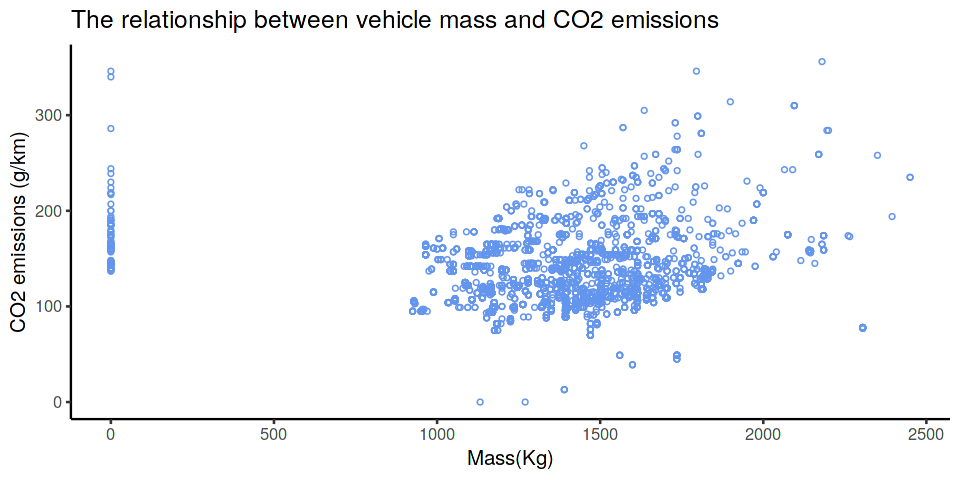

In [6]:
car_data %>%
    ggplot(aes(x = Mass, y = CO2))+
    geom_point(size = 1,
               shape = 1,
               colour = "cornflowerblue")+
    labs(title = "The relationship between vehicle mass and CO2 emissions",
           x = "Mass(Kg)",
           y = "CO2 emissions (g/km)")+
    clean_theme

## Dealing with missing data  
We don't want to include cars with mass = 0 in our plots because they obscure any relationships with mass.  
Still, we don't know where they're coming from, and we need to account for any data we exclude.  
To investigate this data we need to **filter()** the **car_data** to only include cars whose Mass = 0:

```
dataset %>%
filter(variable == value)
```
Note that in the code we use **==** two equals signs.  

We can then summarise this data by using the **summary()** function again:
```
... %>%
summary()
```

#### **Exercise 5**  
Summarise the data for cars whose mass is 0  
#### **Question**
What do all these cars have in common?  
What effects will removing this data have on mean/median mass of vehicle? the differences in mass between 2002 and 2016?

In [7]:
car_data %>%
filter(Mass == 0) %>%
summary()

 ReferenceNumber          Make           PropulsionTypeId            BodyTypeId
 Min.   :  10.0   BMW       :15   Diesel         :31      5 door hatchback:36  
 1st Qu.: 515.5   FORD      :19   Electric       : 0      saloon          :23  
 Median : 849.0   TOYOTA    :27   Electric/Petrol: 0      estate          : 9  
 Mean   : 746.6   VAUXHALL  : 1   Gas/Petrol     : 0      coupe           : 7  
 3rd Qu.: 878.2   VOLKSWAGEN:30   Petrol         :61      3 door hatchback: 6  
 Max.   :1283.0                                           4 door saloon   : 5  
                                                          (Other)         : 6  
      GovRegion                  KeeperTitleId   EngineSize   YearRegistered
 London    :38   company                : 1    Min.   : 998   2002:92       
 North West:25   Female                 :32    1st Qu.:1390   2016: 0       
 South West:29   Male                   :56    Median :1795                 
                 unknown (Dr, Rev, etc.): 3    Mean 

## Updating the dataset  
We need to create a new dataset without cars with mass = 0:
1) Name a **new_dataset** followed by **<-**
2) **filter()** the old data set as above
3) This time we don't want cars with mass zero though, we want cars with mass **greater than zero**, for this wee use the **>** sign
```
new_data <-
    dataset %>%
    filter(variable > value)
```

#### **Exercise 6**  
Create a new dataset called **mass_filter_data** which includes only cars with mass greater than zero

In [10]:
mass_filter_data <-
    car_data %>%
    filter(Mass > 0)
print("mass_filter_data saved")

[1] "mass_filter_data saved"


Run the code below to check your mass_filter_data has fewer rows than the original car_data

In [11]:
nrow(car_data)
nrow(mass_filter_data)

[1] 3827

[1] 3735

#### **Exercise 7**
Using the **mass_filter_data**, plot two more scatter plots:  
a)The relationship between Mass and EngineSize  
b)The relationship between EngineSize and CO2
#### **Questions**  
Why do the scatter plots with engine size appear stripy?
Is the relationship between engine size and CO2 emissions the same as the relationship between mass and CO2 emissions (from above)?


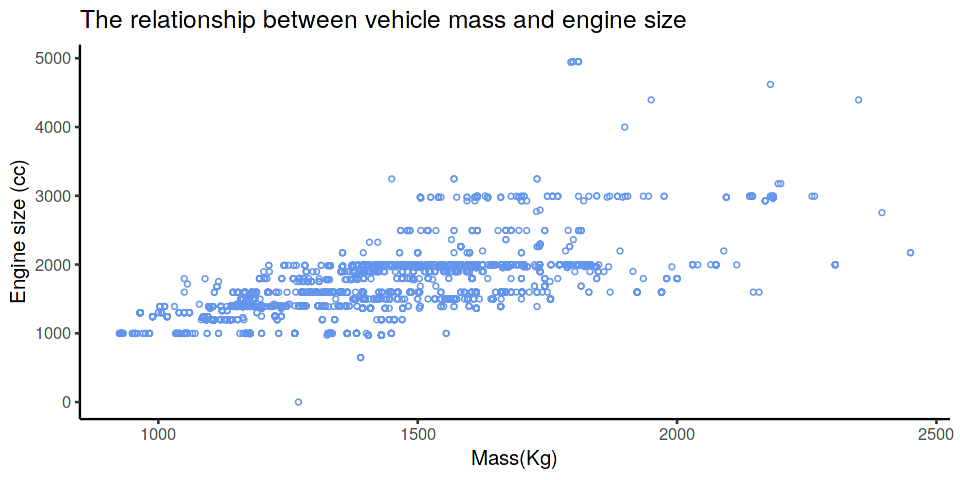

In [12]:
mass_filter_data %>%
  ggplot(aes(x = Mass, y = EngineSize))+
  geom_point(size = 1,
             shape = 1,
             colour = "cornflowerblue")+
  labs(title = "The relationship between vehicle mass and engine size",
       x = "Mass(Kg)",
       y = "Engine size (cc)")+
  clean_theme

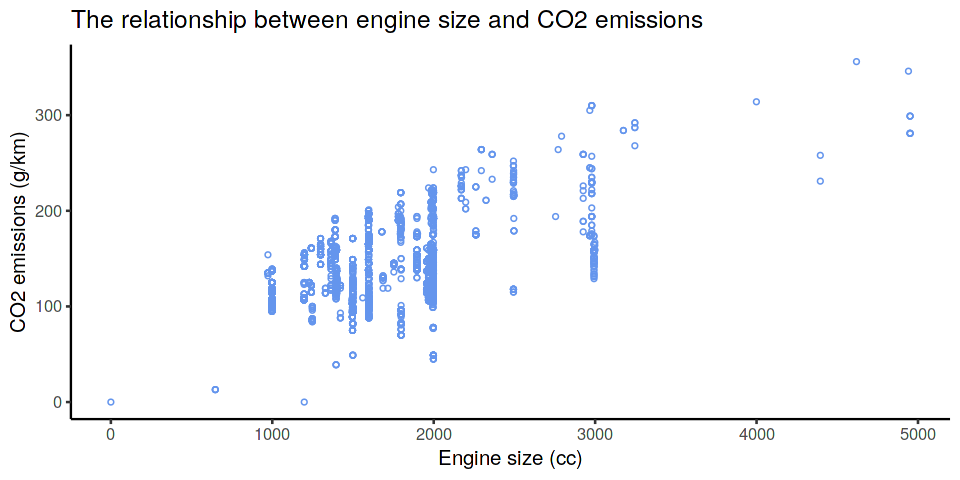

In [15]:
mass_filter_data %>%
  ggplot(aes(x = EngineSize, y = CO2))+
  geom_point(size = 1,
             shape = 1,
             colour = "cornflowerblue")+
  labs(title = "The relationship between engine size and CO2 emissions",
       x = "Engine size (cc)",
       y = "CO2 emissions (g/km)")+
  clean_theme

## Fitting a linear model
We can use graphs like this to predict unknown values of CO2 emissions, given the weight or size of the engine in the car.  
To visualise this, we add a single line of code to our plot:
```
geom_smooth(method = "lm")
```
**geom_smooth()** is a smoothing function which estimates the line of best fit for the data.  
The method we give it **"lm"** stands for **linear model** which means it will fit the best straight line.  

#### **Exercise 8**
Plot  
a) Mass and CO2   
b) EngineSize and CO2  
This time include the linear model on top of the scatter plot

#### Questions
Which has more of an influence on CO2 emissions, weight or mass?  
Check the scale of your x-axis, does your answer remain the same?

`geom_smooth()` using formula 'y ~ x'


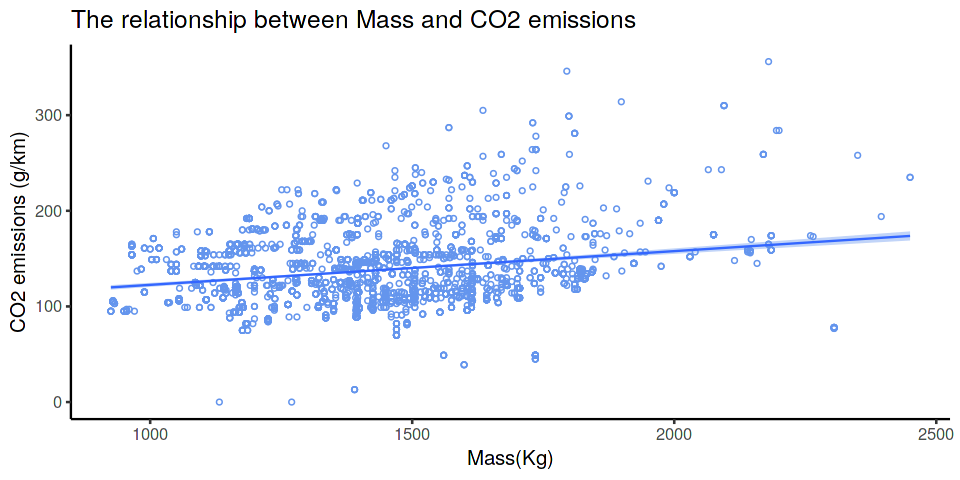

In [20]:
mass_filter_data %>%
  ggplot(aes(x = Mass, y = CO2))+
  geom_point(size = 1,
             shape = 1,
             colour = "cornflowerblue")+
  geom_smooth(method = "lm",
              fill = "cornflowerblue",
              size = 0.5,)+
  labs(title = "The relationship between Mass and CO2 emissions",
       x = "Mass(Kg)",
       y = "CO2 emissions (g/km)")+
  clean_theme

`geom_smooth()` using formula 'y ~ x'


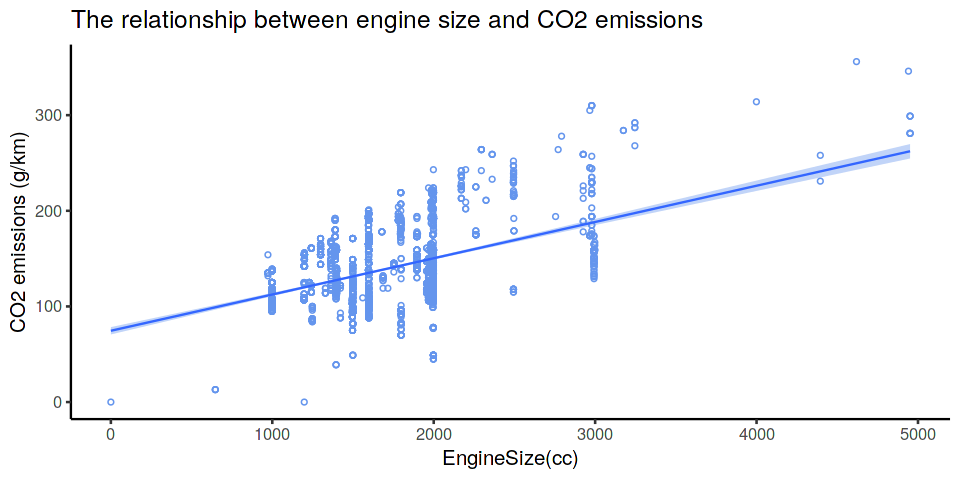

In [18]:
mass_filter_data %>%
  ggplot(aes(x = EngineSize, y = CO2))+
  geom_point(size = 1,
             shape = 1,
             colour = "cornflowerblue")+
  geom_smooth(method = "lm",
              fill = "cornflowerblue",
              size = 0.5,)+
  labs(title = "The relationship between engine size and CO2 emissions",
       x = "EngineSize(cc)",
       y = "CO2 emissions (g/km)")+
  clean_theme

## Quantifying the relationship
Recall the equation for a straight line:  
### $y = mx + c$  
Where $m$ is the gradient of the line and $c$ is the $y$ intercept (value of $y$ when $x = 0$)  
We can use *R* to extract the value of $m$ and $c$ for our linear models using the **lm()** function:
```
lm(variable1 ~ 1 + variable2, data = dataset)
```
In the example above, $y$ = variable1 and $x$ = variable2. The 1 is a dummy value for the intercept when $x$ = variable2 = 0.  
Note that we use **~** instead of equals when defining the formula.

To extract the estimated values of $m$ and $c$ we feed the above to the **coef()** function and then **round(digits = 3)** to round to three decimal places.
```
... %>%
coef() %>%
round(digits = 3)
```
The value of **(intercept)** is $c$ in the equation. And the value of **variable2** is $m$ in your equation.
#### **Exercise**
Find the value of $m$ and $c$ for the two linear models below:  
a) $CO_2 = m*Mass + c$  
b) $CO_2 = m*EngineSize + c$

#### **Questions**
For every Kg increase in car weight, how much does CO2 emissions increase by?  
Does Mass (per Kg) or Engine size (per cc) have more of an effect on CO2 emissions?  
My car has a mass of 1200Kg and an engine size of 4000cc. What does each model predict its emissions will be?  
Why do you get two very different answers?

In [22]:
lm(CO2 ~ 1 + Mass, data = mass_filter_data) %>%
coef() %>%
round(digits = 3)

(Intercept)        Mass 
     87.291       0.035

In [23]:
lm(CO2 ~ 1 + EngineSize, data = mass_filter_data) %>%
coef() %>%
round(digits = 3)

(Intercept)  EngineSize 
     74.561       0.038

## Including multiple predictors in our models
We don't have to settle for just one predictor. In fact, we can use as many as we like:
```
lm(variable1 ~ 1 + variable2 + variable3 + variable4 + variable5...., data = dataset)
```
#### **Exercise**
Calculate the values of $m_1$ and $m_2$ and $c$ for the model below  
$CO_2$ = $m_1$*$Mass$ + $m_2$*$EngineSize$ + $c$

#### **Question**
Do you still think mass and engine size have the same effect on CO2 emissions?  
Using **Exercise 7**, can you explain why the estimates have changed?

In [25]:
lm(CO2 ~ 1 + Mass + EngineSize, data = mass_filter_data) %>%
coef() %>%
round(digits = 3)

(Intercept)        Mass  EngineSize 
     88.108      -0.017       0.044